## Aprendizado Supervisionado
### prof. Duncan
Prática com KNN e Iris

In [1]:
#pacote para profiling de datasets
#!pip install ydata_profiling
# pacotes básicos
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from ydata_profiling import ProfileReport


# pacotes do sklearn para acesso a datasets, preparação, modelagem e avaliação
from sklearn import datasets
#
# pacote para separação entre treino e teste
from sklearn.model_selection import train_test_split
#
# arsenal de preparação
from sklearn.preprocessing import MinMaxScaler # rescala em min-max
from sklearn.preprocessing import StandardScaler # padroniza features removendo média e
#     escalando para variância unitária. Também chamado de z-score
#
# pacote pipeline para combinar preparação e modelagem
from sklearn.pipeline import Pipeline, make_pipeline
#
# pacotes para validação cruzada
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
#
# pacotes de indução de modelos
from sklearn.neighbors import KNeighborsClassifier
#
# pacotes para avaliação dos resultados
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.tree import plot_tree, export_graphviz, export_text

#pacotes para apoio a leitura e gravação de datasets
from pathlib import Path
import csv

#pacotes para visualização e formatação
import pprint
import graphviz
#
# configurações para os diferentes pacotes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [2]:
# carga de dados
iris = datasets.load_iris(as_frame=True)
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [3]:
# separação em features e target e profiling do dataset
X = iris.data
y = iris.target
Xy = iris.frame
#relatorio = ProfileReport(Xy, title="Iris data set")
#relatorio.to_notebook_iframe()


In [4]:
Xy

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [29]:
# procedimento para listar treino e teste
def lista_treino_teste(treino_X, treino_y, teste_X, teste_y):
  treino = treino_X.copy()
  treino.set_axis(['sepallength', 'sepalwidth', 'petallength', 'petalwidth'], axis="columns", copy=False)
  treino['class'] = treino_y.copy()
  teste = teste_X.copy()
  teste.set_axis(['sepallength', 'sepalwidth', 'petallength', 'petalwidth'], axis="columns", copy=False)
  teste['class'] = teste_y.copy()
  treinoteste = pd.concat([treino, teste], ignore_index=True)
  print(treino_X.shape)
  print(treino_y.shape)
  print(teste_X.shape)
  print(teste_y.shape)
  print(np.stack(np.unique(teste_y, return_counts=True), axis=1))
  print(treinoteste.to_string())


In [6]:
# separação em treino e teste, e X e y
# importante fazer ANTES do pipeline para evitar data leakage

tr_unsh_X, te_unsh_X, tr_unsh_y, te_unsh_y = train_test_split(X, y, random_state=0,test_size=0.333, shuffle=False)

treino_X, teste_X, treino_y, teste_y = train_test_split(X, y, random_state=46,test_size=0.333, stratify=y)


In [7]:
lista_treino_teste(tr_unsh_X, tr_unsh_y, te_unsh_X, te_unsh_y)

(100, 4)
(100,)
(50, 4)
(50,)
[[ 2 50]]
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  class
0                  5.1               3.5                1.4               0.2      0
1                  4.9               3.0                1.4               0.2      0
2                  4.7               3.2                1.3               0.2      0
3                  4.6               3.1                1.5               0.2      0
4                  5.0               3.6                1.4               0.2      0
5                  5.4               3.9                1.7               0.4      0
6                  4.6               3.4                1.4               0.3      0
7                  5.0               3.4                1.5               0.2      0
8                  4.4               2.9                1.4               0.2      0
9                  4.9               3.1                1.5               0.1      0
10                 5.4   

In [8]:
lista_treino_teste(treino_X, treino_y, teste_X, teste_y)

(100, 4)
(100,)
(50, 4)
(50,)
[[ 0 16]
 [ 1 17]
 [ 2 17]]
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  class
0                  6.7               3.1                4.4               1.4      1
1                  6.1               2.9                4.7               1.4      1
2                  5.5               4.2                1.4               0.2      0
3                  5.0               3.4                1.6               0.4      0
4                  7.4               2.8                6.1               1.9      2
5                  6.7               3.0                5.0               1.7      1
6                  6.5               3.2                5.1               2.0      2
7                  6.7               3.3                5.7               2.5      2
8                  6.9               3.1                5.1               2.3      2
9                  6.7               2.5                5.8               1.8      2
10     

In [9]:
# configurações para experimentos

n_vizinhos = [1, 3, 5, 7, 9, 11, 13]
#n_vizinhos = [1, 3, 5]

k_splits = 10


## Experimento sem reescala de valores e sem embaralhamento dos dados

k= 1   Acuracia= 0.0
k= 3   Acuracia= 0.0
k= 5   Acuracia= 0.0
k= 7   Acuracia= 0.0
k= 9   Acuracia= 0.0
k= 11   Acuracia= 0.0
k= 13   Acuracia= 0.0


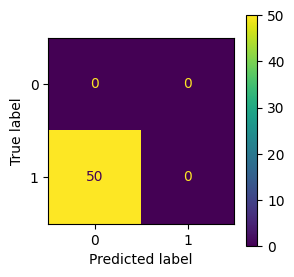

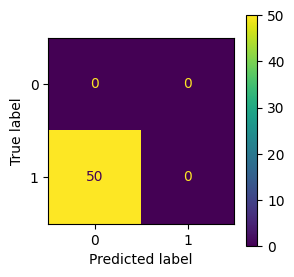

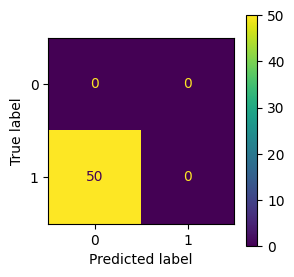

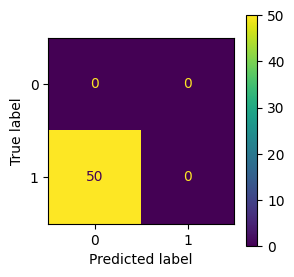

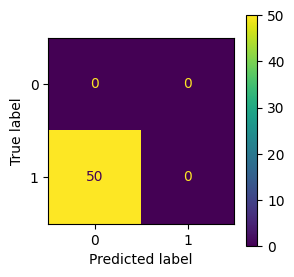

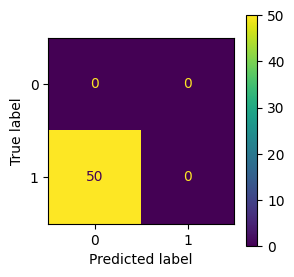

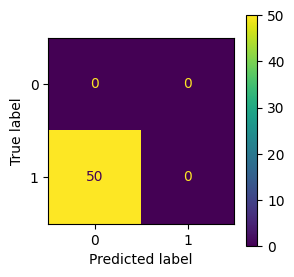

In [10]:
# indução do modelo para diferentes números de vizinhos

for n in n_vizinhos:
    modelo = KNeighborsClassifier(n_neighbors=n)
    modelo.fit(tr_unsh_X, tr_unsh_y)
    te_unsh_pred_y = modelo.predict(te_unsh_X)
    acuracia = accuracy_score(te_unsh_y, te_unsh_pred_y)
    resultado = confusion_matrix(te_unsh_y, te_unsh_pred_y)
    confusion_matrix_display = ConfusionMatrixDisplay(resultado).plot()
    fig = confusion_matrix_display.figure_
    fig.set_figheight(3)
    fig.set_figwidth(3)
    print('k=', n,'  Acuracia=', acuracia)


## Experimento sem reescala de valores e com embaralhamento dos dados

k= 1   Acuracia= 0.96
k= 3   Acuracia= 0.96
k= 5   Acuracia= 0.96
k= 7   Acuracia= 0.96
k= 9   Acuracia= 0.96
k= 11   Acuracia= 0.96
k= 13   Acuracia= 0.98


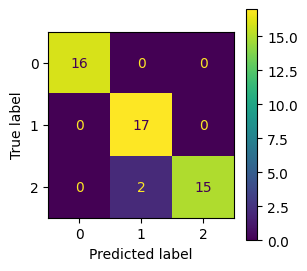

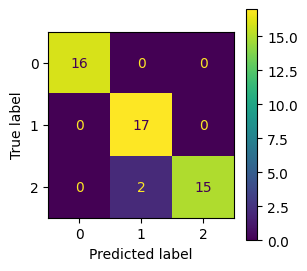

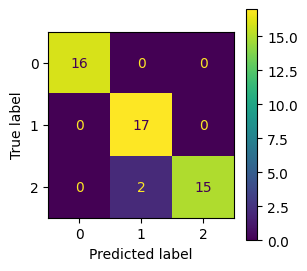

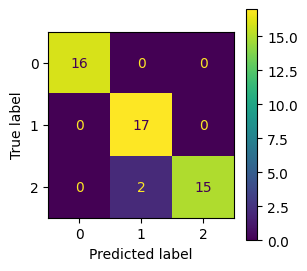

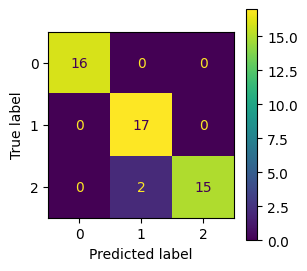

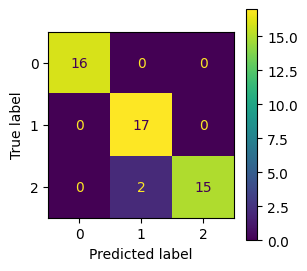

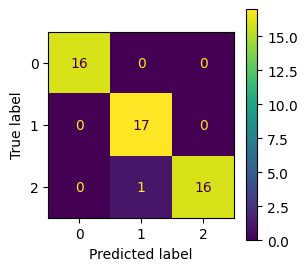

In [11]:
# indução do modelo para diferentes números de vizinhos

for n in n_vizinhos:
    modelo = KNeighborsClassifier(n_neighbors=n)
    modelo.fit(treino_X, treino_y)
    teste_pred_y = modelo.predict(teste_X)
    acuracia = accuracy_score(teste_y, teste_pred_y)
    resultado = confusion_matrix(teste_y, teste_pred_y)
    confusion_matrix_display = ConfusionMatrixDisplay(resultado).plot()
    fig = confusion_matrix_display.figure_
    fig.set_figheight(3)
    fig.set_figwidth(3)
    print('k=', n,'  Acuracia=', acuracia)



### Modelagem usando validação cruzada e com indução explícita para cada pasta

k=1 ------------------------
k=1 i=0 Acuracia=0.933
k=1 i=1 Acuracia=1.000
k=1 i=2 Acuracia=0.867
k=1 i=3 Acuracia=1.000
k=1 i=4 Acuracia=1.000
k=1 i=5 Acuracia=0.867
k=1 i=6 Acuracia=1.000
k=1 i=7 Acuracia=1.000
k=1 i=8 Acuracia=1.000
k=1 i=9 Acuracia=0.933
k=1  Acuracia=0.960
k=3 ------------------------
k=3 i=0 Acuracia=0.933
k=3 i=1 Acuracia=1.000
k=3 i=2 Acuracia=0.867
k=3 i=3 Acuracia=1.000
k=3 i=4 Acuracia=1.000
k=3 i=5 Acuracia=0.867
k=3 i=6 Acuracia=1.000
k=3 i=7 Acuracia=1.000
k=3 i=8 Acuracia=1.000
k=3 i=9 Acuracia=0.933
k=3  Acuracia=0.960
k=5 ------------------------
k=5 i=0 Acuracia=1.000
k=5 i=1 Acuracia=1.000


C:\Users\Lais_Ziegler\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:136: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


k=5 i=2 Acuracia=0.933
k=5 i=3 Acuracia=1.000
k=5 i=4 Acuracia=1.000
k=5 i=5 Acuracia=0.867
k=5 i=6 Acuracia=1.000
k=5 i=7 Acuracia=1.000
k=5 i=8 Acuracia=1.000
k=5 i=9 Acuracia=0.933
k=5  Acuracia=0.973
k=7 ------------------------
k=7 i=0 Acuracia=1.000
k=7 i=1 Acuracia=1.000
k=7 i=2 Acuracia=0.867
k=7 i=3 Acuracia=1.000
k=7 i=4 Acuracia=1.000
k=7 i=5 Acuracia=0.867
k=7 i=6 Acuracia=1.000
k=7 i=7 Acuracia=1.000
k=7 i=8 Acuracia=1.000
k=7 i=9 Acuracia=0.933
k=7  Acuracia=0.967
k=9 ------------------------
k=9 i=0 Acuracia=1.000
k=9 i=1 Acuracia=1.000
k=9 i=2 Acuracia=0.867
k=9 i=3 Acuracia=1.000
k=9 i=4 Acuracia=1.000
k=9 i=5 Acuracia=0.933
k=9 i=6 Acuracia=1.000
k=9 i=7 Acuracia=1.000
k=9 i=8 Acuracia=1.000
k=9 i=9 Acuracia=0.933
k=9  Acuracia=0.973
k=11 ------------------------
k=11 i=0 Acuracia=1.000
k=11 i=1 Acuracia=1.000
k=11 i=2 Acuracia=0.867
k=11 i=3 Acuracia=1.000
k=11 i=4 Acuracia=1.000
k=11 i=5 Acuracia=0.933
k=11 i=6 Acuracia=1.000
k=11 i=7 Acuracia=1.000
k=11 i=8 Acuraci

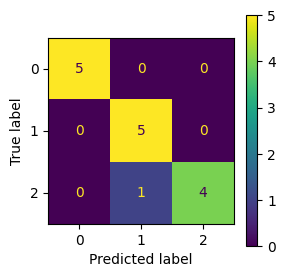

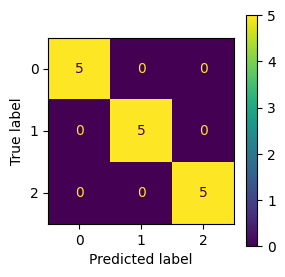

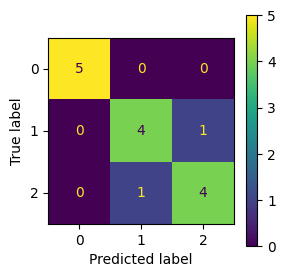

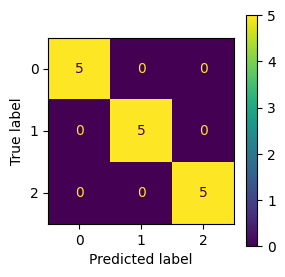

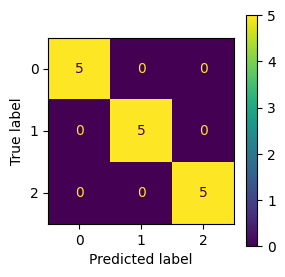

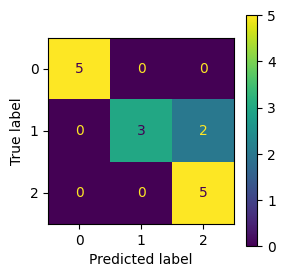

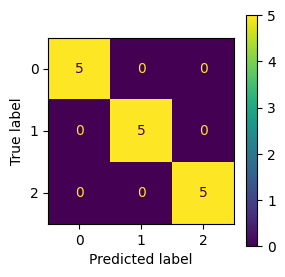

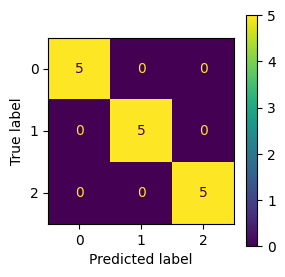

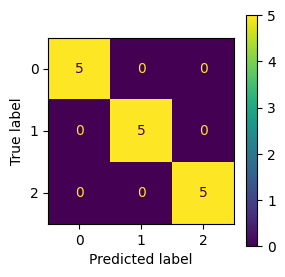

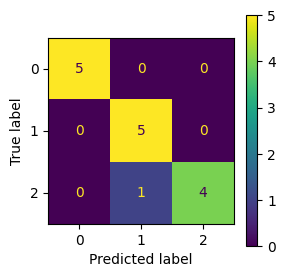

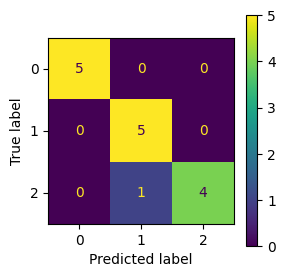

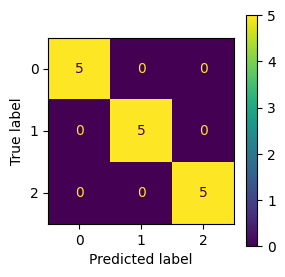

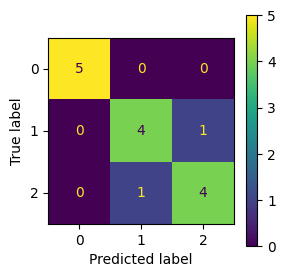

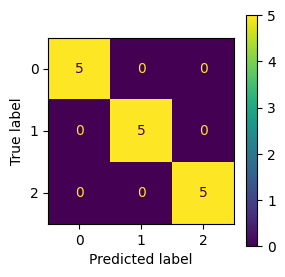

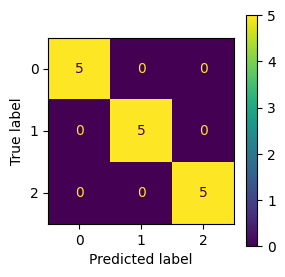

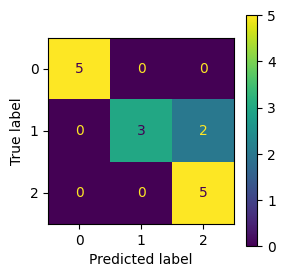

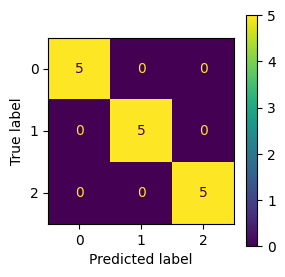

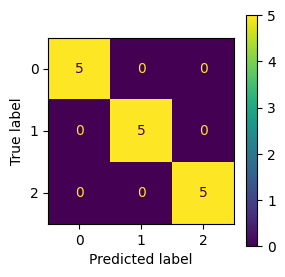

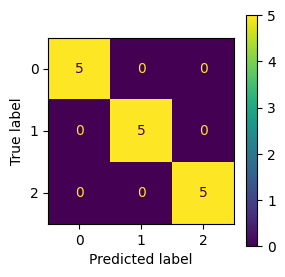

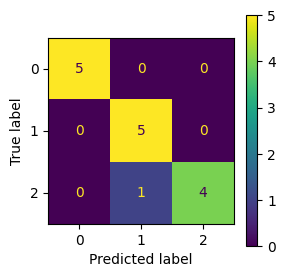

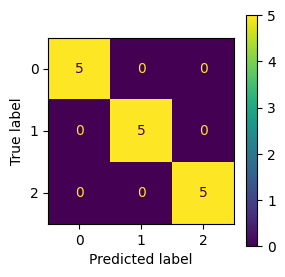

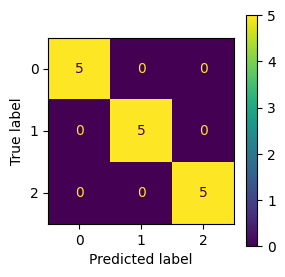

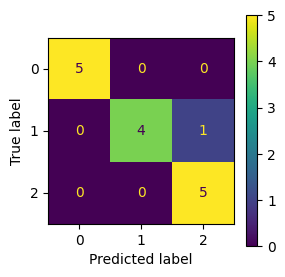

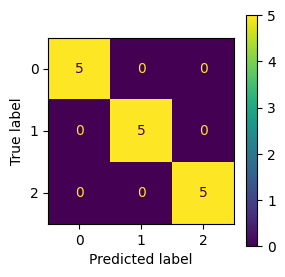

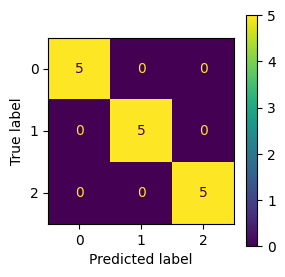

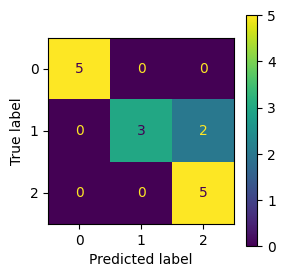

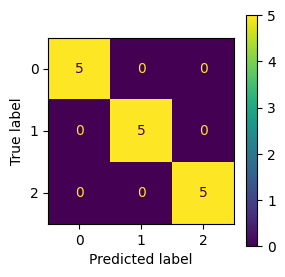

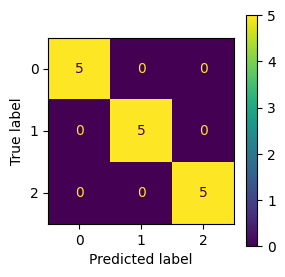

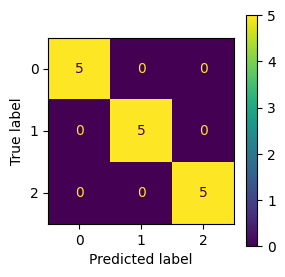

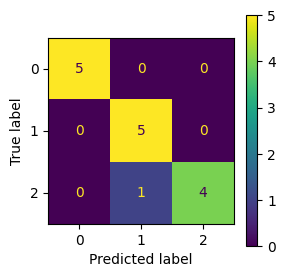

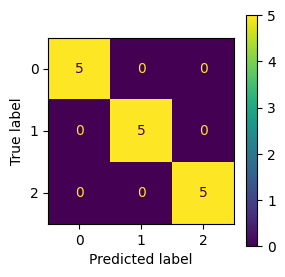

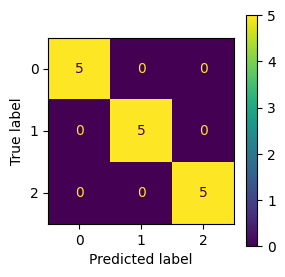

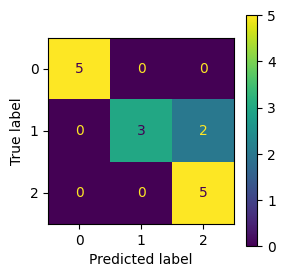

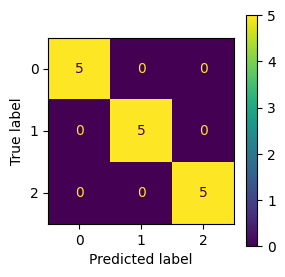

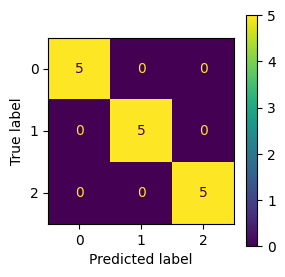

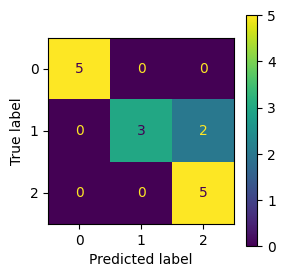

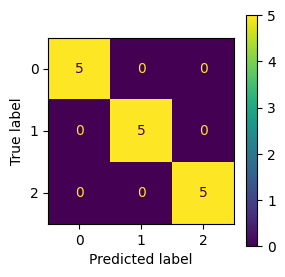

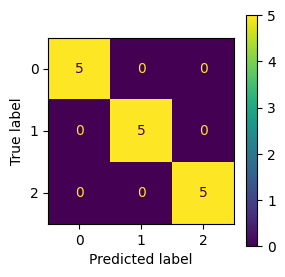

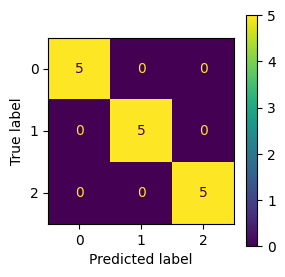

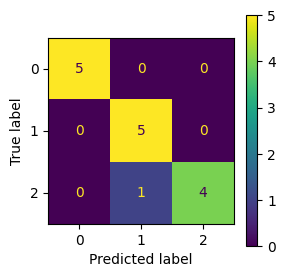

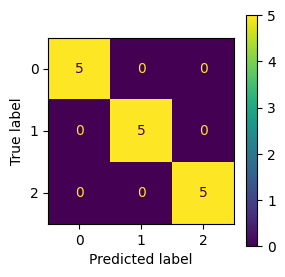

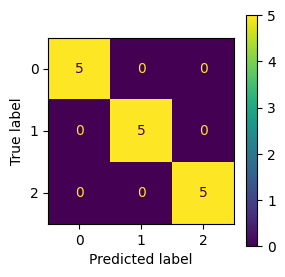

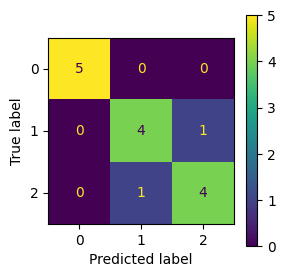

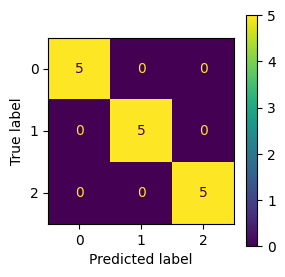

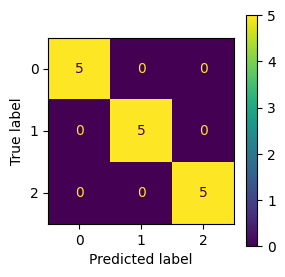

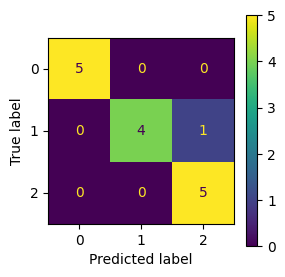

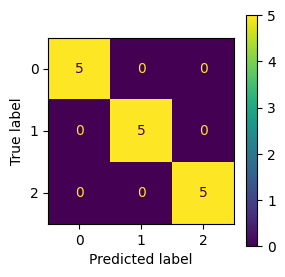

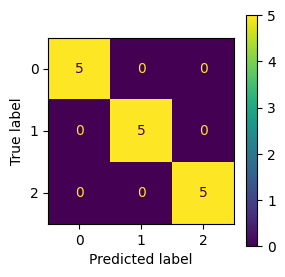

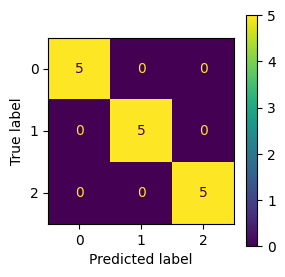

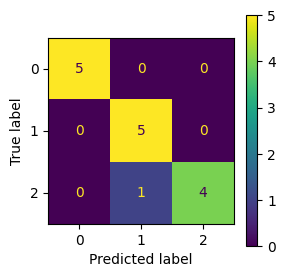

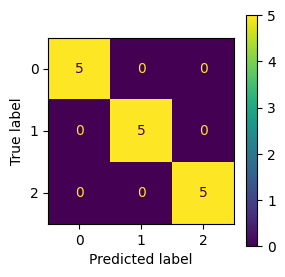

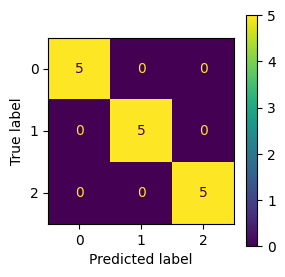

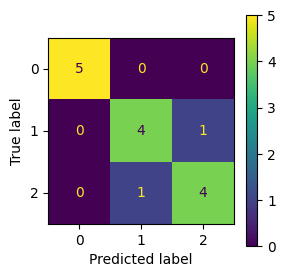

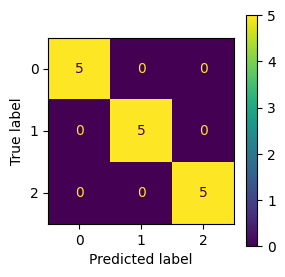

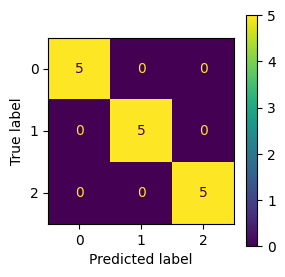

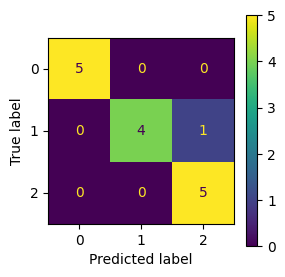

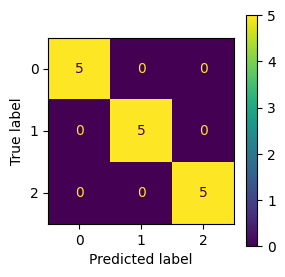

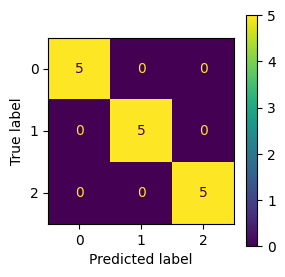

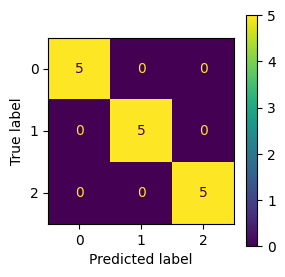

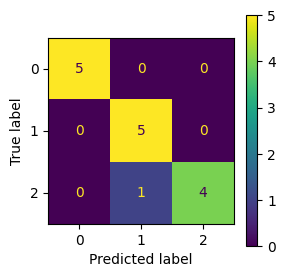

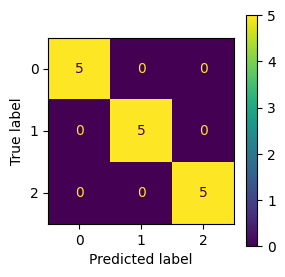

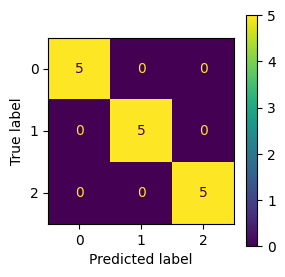

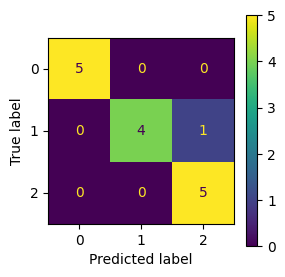

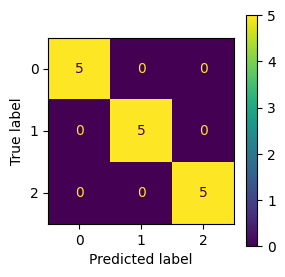

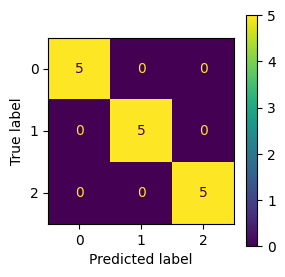

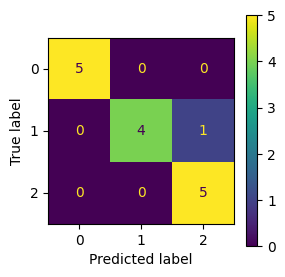

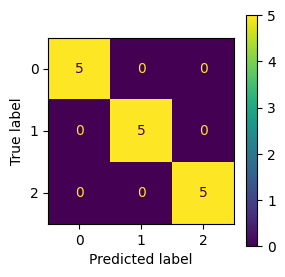

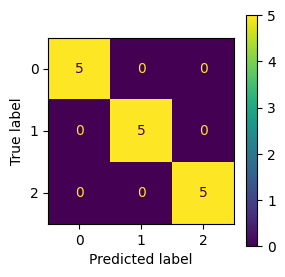

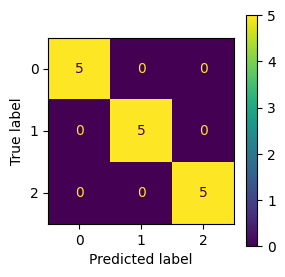

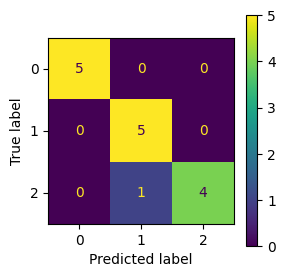

In [12]:
%%time
# indução do modelo para diferentes números de vizinhos com validação cruzada

for n in n_vizinhos:
    acuracia = np.zeros(k_splits)
    modelo = KNeighborsClassifier(n_neighbors=n)
#    kf = KFold(n_splits=k_splits, random_state=None, shuffle=False)
    kf = StratifiedKFold(n_splits=k_splits, random_state=46,shuffle=True)
    print('k={} ------------------------'.format(n))
    for i, (tr_index, te_index) in enumerate(kf.split(X, y)):
      tr_X = X.iloc[tr_index]
      te_X = X.iloc[te_index]
      tr_y = np.ravel(y.iloc[tr_index])
      te_y = np.ravel(y.iloc[te_index])
      modelo.fit(tr_X, tr_y)
      te_pred_y = modelo.predict(te_X)
      acuracia[i] = accuracy_score(te_y, te_pred_y)
      print('k={} i={} Acuracia={:.3f}'.format(n, i, acuracia[i]))
      resultado = confusion_matrix(te_y, te_pred_y)
      confusion_matrix_display = ConfusionMatrixDisplay(resultado).plot()
      fig = confusion_matrix_display.figure_
      fig.set_figheight(3)
      fig.set_figwidth(3)
    print('k={}  Acuracia={:.3f}'.format(n, np.mean(acuracia)))



In [13]:
print(list(enumerate(kf.split(X, y))))

[(0, (array([  0,   1,   3,   4,   5,   6,   8,   9,  10,  11,  13,  14,  15,
        16,  17,  18,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,
        30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  42,  43,
        44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
        57,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
        71,  72,  73,  74,  75,  76,  77,  78,  80,  81,  83,  85,  86,
        87,  88,  89,  90,  91,  92,  93,  94,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 108, 109, 110, 111, 112, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 134, 135, 136, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149]), array([  2,   7,  12,  19,  41,  58,  79,  82,  84,  95, 107, 113, 114,
       133, 137]))), (1, (array([  1,   2,   3,   4,   5,   6,   7,   8,  11,  12,  13,  14,  15,
        16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28

## Modelagem com validação cruzada e com busca exaustiva pelos parâmetros

In [14]:
# indução do modelo para diferentes números de vizinhos com validação cruzada

parametros = { 'n_neighbors': n_vizinhos, 'weights':['uniform', 'distance']}
modelo = KNeighborsClassifier()
valcruz = GridSearchCV(modelo, parametros,cv=k_splits)
valcruz.fit(X, y)
resultados = pd.DataFrame(valcruz.cv_results_).sort_values(by='rank_test_score')
print('Melhor resultado - Número vizinhos:{}   Pesos:{}    Acurácia média:{:.3f}'.format(
    resultados['param_n_neighbors'].iloc[0],
    resultados['param_weights'].iloc[0],
    resultados['mean_test_score'].iloc[0]))


Melhor resultado - Número vizinhos:13   Pesos:uniform    Acurácia média:0.980


In [15]:
resultados

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
12,0.001193,0.000398,0.002202,0.000738,13,uniform,"{'n_neighbors': 13, 'weights': 'uniform'}",1.0,0.933333,1.0,1.000000,1.000000,0.933333,0.933333,1.000000,1.0,1.0,0.980000,0.030551,1
9,0.001005,0.000448,0.001295,0.000635,9,distance,"{'n_neighbors': 9, 'weights': 'distance'}",1.0,0.933333,1.0,1.000000,0.933333,0.933333,0.933333,1.000000,1.0,1.0,0.973333,0.032660,2
8,0.001197,0.000603,0.001804,0.000402,9,uniform,"{'n_neighbors': 9, 'weights': 'uniform'}",1.0,0.933333,1.0,1.000000,1.000000,0.933333,0.933333,0.933333,1.0,1.0,0.973333,0.032660,2
11,0.000906,0.000303,0.001168,0.000680,11,distance,"{'n_neighbors': 11, 'weights': 'distance'}",1.0,0.933333,1.0,1.000000,0.933333,0.933333,0.933333,1.000000,1.0,1.0,0.973333,0.032660,2
13,0.001104,0.000547,0.001198,0.000603,13,distance,"{'n_neighbors': 13, 'weights': 'distance'}",1.0,0.933333,1.0,1.000000,0.933333,0.933333,0.933333,1.000000,1.0,1.0,0.973333,0.032660,2
7,0.001099,0.000302,0.001154,0.000322,7,distance,"{'n_neighbors': 7, 'weights': 'distance'}",1.0,0.933333,1.0,1.000000,0.866667,0.933333,0.933333,1.000000,1.0,1.0,0.966667,0.044721,6
5,0.001201,0.000601,0.001299,0.000457,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",1.0,0.933333,1.0,1.000000,0.866667,0.933333,0.933333,1.000000,1.0,1.0,0.966667,0.044721,6
6,0.001502,0.000500,0.002199,0.000402,7,uniform,"{'n_neighbors': 7, 'weights': 'uniform'}",1.0,0.933333,1.0,1.000000,0.866667,0.933333,0.933333,1.000000,1.0,1.0,0.966667,0.044721,6
4,0.001700,0.000640,0.002853,0.000777,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",1.0,0.933333,1.0,1.000000,0.866667,0.933333,0.933333,1.000000,1.0,1.0,0.966667,0.044721,6
10,0.001202,0.000600,0.001650,0.000449,11,uniform,"{'n_neighbors': 11, 'weights': 'uniform'}",1.0,0.933333,1.0,1.000000,1.000000,0.866667,0.933333,0.933333,1.0,1.0,0.966667,0.044721,6


In [16]:
valcruz.cv_results_['params']

[{'n_neighbors': 1, 'weights': 'uniform'},
 {'n_neighbors': 1, 'weights': 'distance'},
 {'n_neighbors': 3, 'weights': 'uniform'},
 {'n_neighbors': 3, 'weights': 'distance'},
 {'n_neighbors': 5, 'weights': 'uniform'},
 {'n_neighbors': 5, 'weights': 'distance'},
 {'n_neighbors': 7, 'weights': 'uniform'},
 {'n_neighbors': 7, 'weights': 'distance'},
 {'n_neighbors': 9, 'weights': 'uniform'},
 {'n_neighbors': 9, 'weights': 'distance'},
 {'n_neighbors': 11, 'weights': 'uniform'},
 {'n_neighbors': 11, 'weights': 'distance'},
 {'n_neighbors': 13, 'weights': 'uniform'},
 {'n_neighbors': 13, 'weights': 'distance'}]

## Experimentos com reescala de valores
### Preparação e modelagem, cuidando para não ocorrer data leakage

### Experimento sem embaralhamento dos dados


k=1  Acuracia=0.000
k=3  Acuracia=0.000
k=5  Acuracia=0.000
k=7  Acuracia=0.000
k=9  Acuracia=0.000
k=11  Acuracia=0.000
k=13  Acuracia=0.000


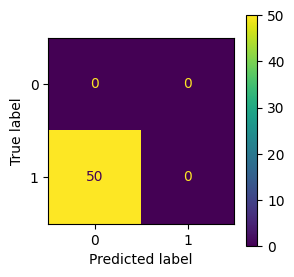

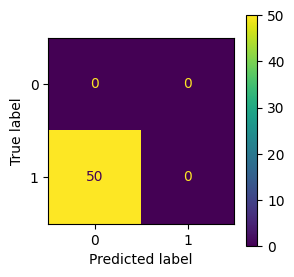

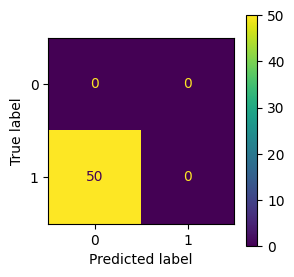

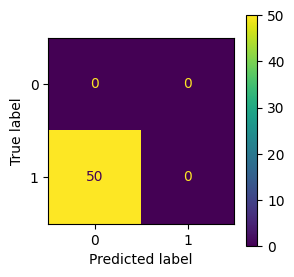

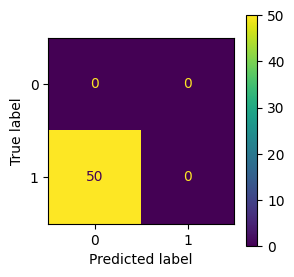

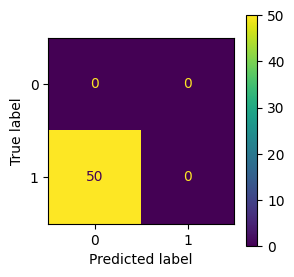

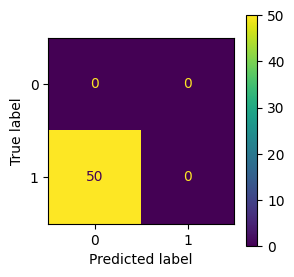

In [17]:
# protocolo experimental versão

for n in n_vizinhos:
  escalonador = MinMaxScaler()
#  escalonador = StandardScaler()
  estimador = KNeighborsClassifier(n_neighbors= n)
  tr_unsh_X_escalonado = escalonador.fit_transform(tr_unsh_X, tr_unsh_y)
  estimador.fit(tr_unsh_X_escalonado, tr_unsh_y)
  te_unsh_X_escalonado = escalonador.transform(te_unsh_X)
  te_unsh_pred_y = estimador.predict(te_unsh_X_escalonado)
  acuracia = accuracy_score(te_unsh_y, te_unsh_pred_y)
  resultado = confusion_matrix(te_unsh_y, te_unsh_pred_y)
  confusion_matrix_display = ConfusionMatrixDisplay(resultado).plot()
  fig = confusion_matrix_display.figure_
  fig.set_figheight(3)
  fig.set_figwidth(3)
  print('k={}  Acuracia={:.3f}'.format(n, acuracia))

### Experimento com reescala e embaralhamento dos dados

k=1  Acuracia=0.940
k=3  Acuracia=0.940
k=5  Acuracia=0.940
k=7  Acuracia=0.940
k=9  Acuracia=0.940
k=11  Acuracia=0.940
k=13  Acuracia=0.940


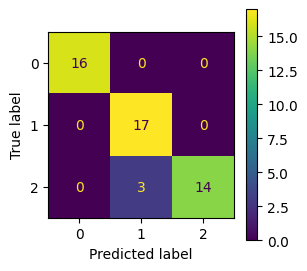

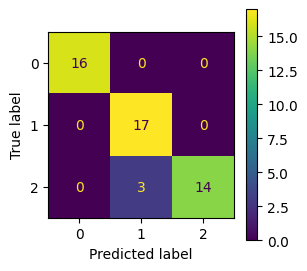

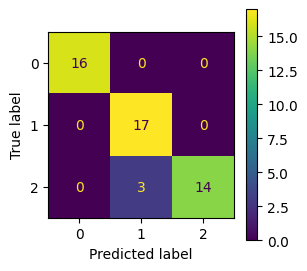

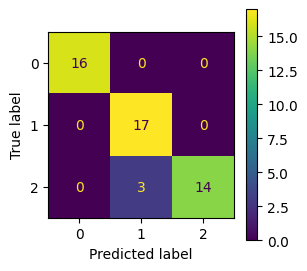

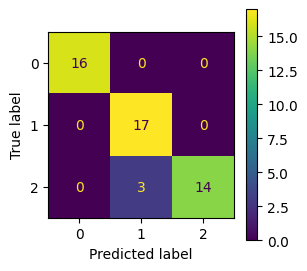

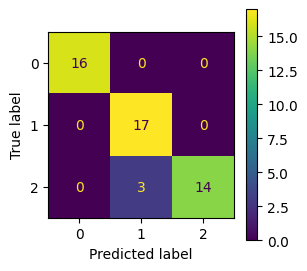

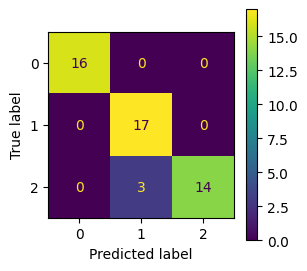

In [18]:
# protocolo experimental

for n in n_vizinhos:
  escalonador = MinMaxScaler()
#  escalonador = StandardScaler()
  estimador = KNeighborsClassifier(n_neighbors= n)
  treino_X_escalonado = escalonador.fit_transform(treino_X, treino_y)
  estimador.fit(treino_X_escalonado, treino_y)
  teste_X_escalonado = escalonador.transform(teste_X)
  teste_pred_y = estimador.predict(teste_X_escalonado)
  acuracia = accuracy_score(teste_y, teste_pred_y)
  resultado = confusion_matrix(teste_y, teste_pred_y)
  confusion_matrix_display = ConfusionMatrixDisplay(resultado).plot()
  fig = confusion_matrix_display.figure_
  fig.set_figheight(3)
  fig.set_figwidth(3)
  print('k={}  Acuracia={:.3f}'.format(n, acuracia))

In [19]:
# conteúdo de X e y com reescala de valores

treino_escalonado = pd.DataFrame({'sepallength': treino_X_escalonado[:, 0],
                                  'sepalwidth': treino_X_escalonado[:, 1],
                                  'petallength': treino_X_escalonado[:, 2],
                                  'petalwidth': treino_X_escalonado[:, 3],
                                  'class': treino_y})

teste_escalonado = pd.DataFrame({'sepallength': teste_X_escalonado[:, 0],
                                  'sepalwidth': teste_X_escalonado[:, 1],
                                  'petallength': teste_X_escalonado[:, 2],
                                  'petalwidth': teste_X_escalonado[:, 3],
                                  'class': teste_y})

In [20]:
iris_escalonado = pd.concat([treino_escalonado, teste_escalonado], ignore_index=True)
print(iris_escalonado.to_string())

     sepallength  sepalwidth  petallength  petalwidth  class
0       0.705882    0.500000     0.589286    0.541667      1
1       0.529412    0.409091     0.642857    0.541667      1
2       0.352941    1.000000     0.053571    0.041667      0
3       0.205882    0.636364     0.089286    0.125000      0
4       0.911765    0.363636     0.892857    0.750000      2
5       0.705882    0.454545     0.696429    0.666667      1
6       0.647059    0.545455     0.714286    0.791667      2
7       0.705882    0.590909     0.821429    1.000000      2
8       0.764706    0.500000     0.714286    0.916667      2
9       0.705882    0.227273     0.839286    0.708333      2
10      0.235294    0.681818     0.053571    0.041667      0
11      0.176471    0.454545     0.053571    0.041667      0
12      0.235294    0.818182     0.142857    0.125000      0
13      0.088235    0.545455     0.053571    0.041667      0
14      0.470588    0.454545     0.714286    0.708333      2
15      0.676471    0.40

In [21]:
iris_escalonado.dtypes


sepallength    float64
sepalwidth     float64
petallength    float64
petalwidth     float64
class            int64
dtype: object

## Experimento com reescala de valores, embaralhamento e busca exaustiva nos parâmetros

In [22]:
# protocolo experimental com preparação e modelagem
modelo = Pipeline(steps=[
    ('reescala', MinMaxScaler()),
     ('modelagem', KNeighborsClassifier())
    ])
parametros = {'modelagem__n_neighbors':n_vizinhos}
kfold = KFold(n_splits=k_splits, shuffle=True, random_state=0)
grade = GridSearchCV(modelo, param_grid=parametros, cv=kfold)
grade.fit(X,y)
print('Melhor k:{}  score:{:0.3f}'.format(grade.best_params_, grade.best_score_))

Melhor k:{'modelagem__n_neighbors': 7}  score:0.973


In [23]:
grade

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('reescala', MinMaxScaler()),
                                       ('modelagem', KNeighborsClassifier())]),
             param_grid={'modelagem__n_neighbors': [1, 3, 5, 7, 9, 11, 13]})

In [24]:
resultados = pd.DataFrame(grade.cv_results_).sort_values(by='rank_test_score')
resultados

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_modelagem__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
3,0.002012,0.000622,0.002003,0.000903,7,{'modelagem__n_neighbors': 7},1.000000,1.0,0.933333,0.8,1.0,1.0,1.0,1.0,1.000000,1.000000,0.973333,0.061101,1
6,0.001392,0.000794,0.002307,0.000909,13,{'modelagem__n_neighbors': 13},1.000000,1.0,0.933333,0.8,1.0,1.0,1.0,1.0,1.000000,1.000000,0.973333,0.061101,1
4,0.001704,0.000457,0.001596,0.000488,9,{'modelagem__n_neighbors': 9},1.000000,1.0,0.933333,0.8,1.0,1.0,1.0,1.0,0.866667,1.000000,0.960000,0.067987,3
2,0.002601,0.000490,0.002599,0.000799,5,{'modelagem__n_neighbors': 5},1.000000,1.0,0.933333,0.8,1.0,1.0,1.0,1.0,0.933333,0.933333,0.960000,0.061101,3
0,0.002903,0.001382,0.002242,0.000687,1,{'modelagem__n_neighbors': 1},0.933333,1.0,0.933333,0.8,1.0,1.0,1.0,1.0,0.933333,0.933333,0.953333,0.060000,5
1,0.002396,0.000486,0.002910,0.000950,3,{'modelagem__n_neighbors': 3},0.933333,1.0,0.933333,0.8,1.0,1.0,1.0,1.0,0.933333,0.933333,0.953333,0.060000,5
5,0.001599,0.000649,0.001249,0.000623,11,{'modelagem__n_neighbors': 11},1.000000,1.0,0.933333,0.8,1.0,1.0,1.0,1.0,0.866667,0.933333,0.953333,0.066999,5


### Captura dos melhores parâmetros para indução do modelo de aprendizado

k= 7   Acuracia= 0.94


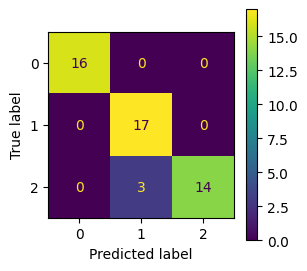

In [25]:
# captura da melhor configuração
n_neighbors_best = grade.best_params_['modelagem__n_neighbors']
escalonador = MinMaxScaler()
modelo = KNeighborsClassifier(n_neighbors=n_neighbors_best)
treino_X_escalonado = escalonador.fit_transform(treino_X, treino_y)
teste_X_escalonado = escalonador.transform(teste_X)
modelo.fit(treino_X_escalonado, treino_y)
teste_pred_y = modelo.predict(teste_X_escalonado)
acuracia = accuracy_score(teste_y, teste_pred_y)
resultado = confusion_matrix(teste_y, teste_pred_y)
confusion_matrix_display = ConfusionMatrixDisplay(resultado).plot()
fig = confusion_matrix_display.figure_
fig.set_figheight(3)
fig.set_figwidth(3)
print('k=', n_neighbors_best,'  Acuracia=', acuracia)



## Mostra da distribuição de pontos e classes, para petallength e petalwidth, no treino

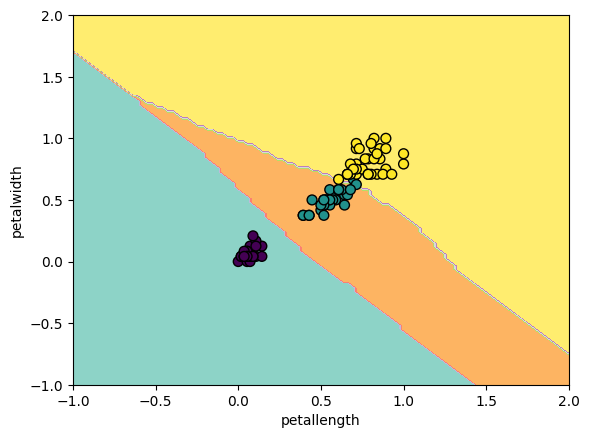

In [26]:
X_mostra = treino_X_escalonado[:, 2:4].copy()
modelo_mostra = KNeighborsClassifier(n_neighbors=n_neighbors_best)
modelo_mostra.fit(X_mostra, treino_y)
mostra = DecisionBoundaryDisplay.from_estimator(
    modelo_mostra,
    X_mostra,
    response_method="predict",
    cmap=plt.cm.Set3,
    xlabel='petallength',
    ylabel='petalwidth',
)
mostra.ax_.scatter(
    X_mostra[:, 0], X_mostra[:, 1], c=treino_y, s=50,
    cmap=plt.cm.viridis, edgecolor="black", linewidth=1
)

## Agora, no teste

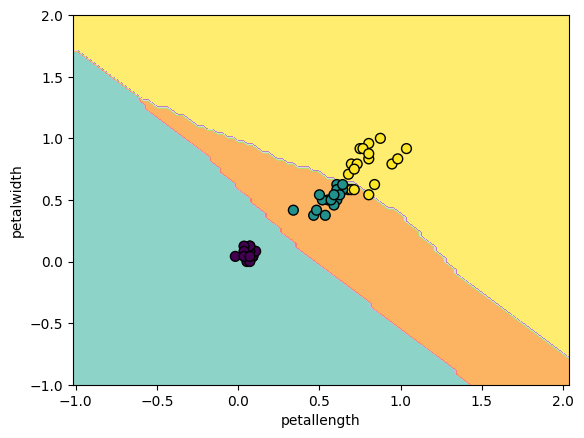

In [27]:
X_mostra = teste_X_escalonado[:, 2:4].copy()
mostra = DecisionBoundaryDisplay.from_estimator(
    modelo_mostra,
    X_mostra,
    response_method="predict",
    cmap=plt.cm.Set3,
    xlabel='petallength',
    ylabel='petalwidth',
)
mostra.ax_.scatter(
    X_mostra[:, 0], X_mostra[:, 1], c=teste_y, s=50,
    cmap=plt.cm.viridis, edgecolor="black", linewidth=1
)